<a href="https://colab.research.google.com/github/adarshsingh098/EXPLORATORY-DATA-ANALYSIS-BIG-BASKET-/blob/main/project1_big_basket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BigBasket Products.csv')

In [5]:
df.head(12)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
5,6,Germ - Removal Multipurpose Wipes,Cleaning & Household,All Purpose Cleaners,Nature Protect,169.0,199.0,Disinfectant Spray & Cleaners,3.3,Stay protected from contamination with Multipu...
6,7,Multani Mati,Beauty & Hygiene,Skin Care,Satinance,58.0,58.0,Face Care,3.6,Satinance multani matti is an excellent skin t...
7,8,Hand Sanitizer - 70% Alcohol Base,Beauty & Hygiene,Bath & Hand Wash,Bionova,250.0,250.0,Hand Wash & Sanitizers,4.0,70%Alcohol based is gentle of hand leaves skin...
8,9,Biotin & Collagen Volumizing Hair Shampoo + Bi...,Beauty & Hygiene,Hair Care,StBotanica,1098.0,1098.0,Shampoo & Conditioner,3.5,"An exclusive blend with Vitamin B7 Biotin, Hyd..."
9,10,"Scrub Pad - Anti- Bacterial, Regular",Cleaning & Household,"Mops, Brushes & Scrubs",Scotch brite,20.0,20.0,"Utensil Scrub-Pad, Glove",4.3,Scotch Brite Anti- Bacterial Scrub Pad thoroug...


 **Let's drop any duplicate entries dataset**

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(27555, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27549 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18919 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [10]:
df.describe()

,index,sale_price,market_price,rating
count,27555.00000,27549.000000,27555.000000,18919.000000
mean,13778.00000,334.648391,382.056664,3.943295
std,7954.58767,1202.102113,581.730717,0.739217
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,3.700000
50%,13778.00000,190.320000,220.000000,4.100000
75%,20666.50000,359.000000,425.000000,4.300000
max,27555.00000,112475.000000,12500.000000,5.000000


In [11]:
df.isnull().sum()

,0
index,0
product,1
category,0
sub_category,0
brand,1
sale_price,6
market_price,0
type,0
rating,8636
description,115


In [12]:
df.isnull().sum().sum()

8759

<Axes: >

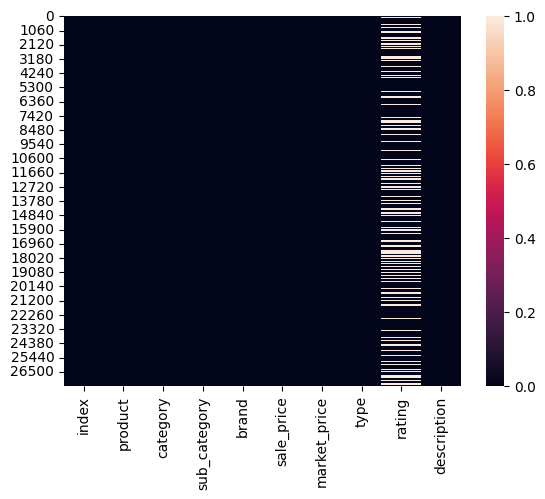

In [13]:
sns.heatmap(df.isnull())

# **Handeling Missing Value in Dataset**

First Handeling Missing Valus in numerical  columns in dataset

**The "sale_price" column are numeric and skewed, in this case you will impute missing values with Median. And same also in "ratting" column impute missing values with median **.



In [14]:
df_int = df.select_dtypes(include = ['int64','float64'])

<ipython-input-15-d55917b4c235>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_int[num],bins = 20,kde_kws ={'linewidth':5,'color':'#DC143C' })


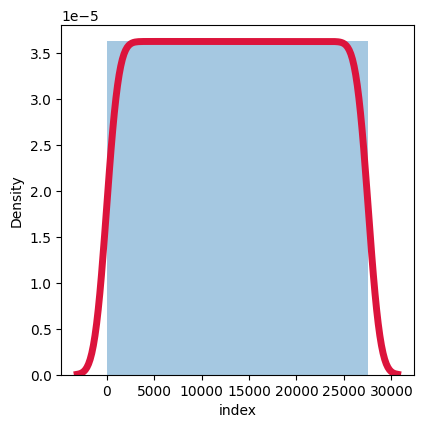

<ipython-input-15-d55917b4c235>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_int[num],bins = 20,kde_kws ={'linewidth':5,'color':'#DC143C' })


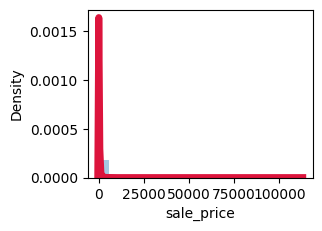

<ipython-input-15-d55917b4c235>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_int[num],bins = 20,kde_kws ={'linewidth':5,'color':'#DC143C' })


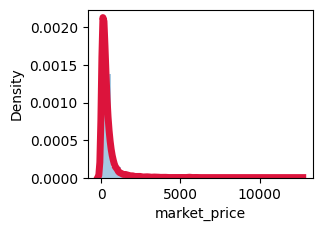

<ipython-input-15-d55917b4c235>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_int[num],bins = 20,kde_kws ={'linewidth':5,'color':'#DC143C' })


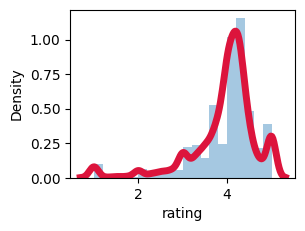

In [15]:

plt.figure(figsize = (10,10))
for i,num in enumerate(df_int):
  plt.subplot(2,2,i+1)
  sns.distplot(df_int[num],bins = 20,kde_kws ={'linewidth':5,'color':'#DC143C' })
  plt.show()

In [16]:
median_sale_price = df['sale_price'].median()
median_sale_price

190.32

In [17]:
df['sale_price'].fillna(median_sale_price ,inplace=True)

<ipython-input-17-26856141cf75>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sale_price'].fillna(median_sale_price ,inplace=True)


In [18]:
median_rating = df['rating'].median()
median_rating

4.1

In [19]:
df['rating'].fillna(median_rating, inplace=True)

<ipython-input-19-c4528e34f1ee>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(median_rating, inplace=True)


In [20]:
df.isnull().sum()

,0
index,0
product,1
category,0
sub_category,0
brand,1
sale_price,0
market_price,0
type,0
rating,0
description,115


**Handeling Missing Valus in  categorical columns in dataset**

In [21]:
df['product'].fillna('Product is not specified', inplace=True)

<ipython-input-21-59ba89004c54>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['product'].fillna('Product is not specified', inplace=True)


In [22]:
 df['brand'].fillna('No brand provided', inplace=True)

<ipython-input-22-8b007120bdb2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['brand'].fillna('No brand provided', inplace=True)


In [23]:
df['description'].fillna('description are not given', inplace=True)

<ipython-input-23-52dda210ae07>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['description'].fillna('description are not given', inplace=True)


In [24]:
df.isnull().sum()

,0
index,0
product,0
category,0
sub_category,0
brand,0
sale_price,0
market_price,0
type,0
rating,0
description,0


<Axes: >

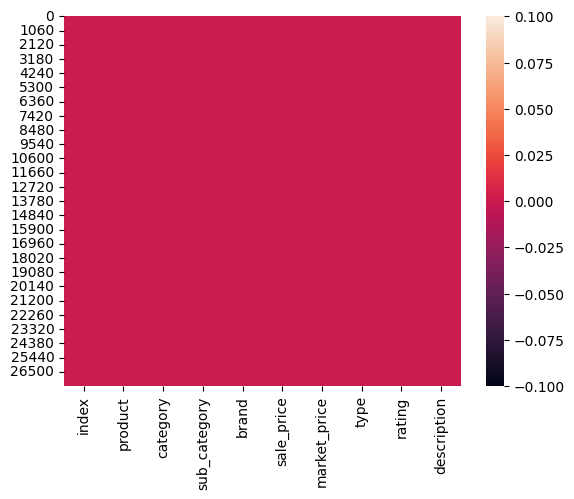

In [25]:
sns.heatmap(df.isnull())

# **Handeling outliers**

<Axes: ylabel='sale_price'>

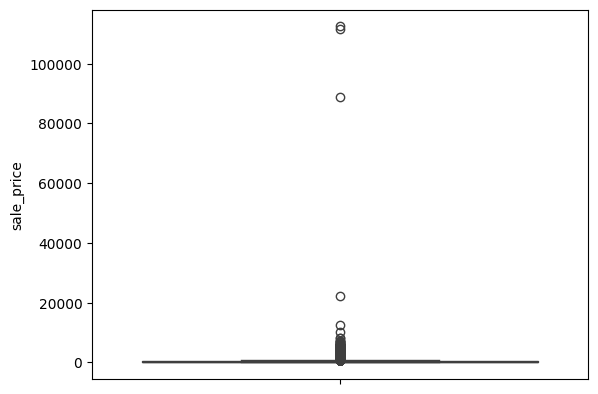

In [26]:
sns.boxplot(df['sale_price'])

<Axes: ylabel='market_price'>

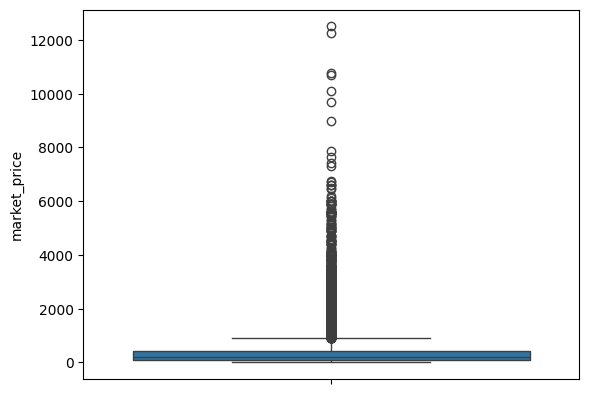

In [27]:
sns.boxplot(df['market_price'])

In [28]:
Q1 = df['market_price'].quantile(0.25)
print(f"Q1 is {Q1}")

Q3 = df['market_price'].quantile(0.75)
print(f"Q3 is {Q3}")

Q1 is 100.0
Q3 is 425.0


In [29]:
IQR = Q3 - Q1
print(f"IQR is {IQR}")

IQR is 325.0


In [30]:
lower_bound = Q1 - 1.5 * IQR
print(lower_bound)

upper_bound = Q3 + 1.5 * IQR
print(upper_bound)

-387.5
912.5


In [31]:
df['market_pricev'] = np.where(df['market_price'] < lower_bound, lower_bound, df['market_price'])
df['market_price'] = np.where(df['market_price'] > upper_bound, upper_bound, df['market_price'])

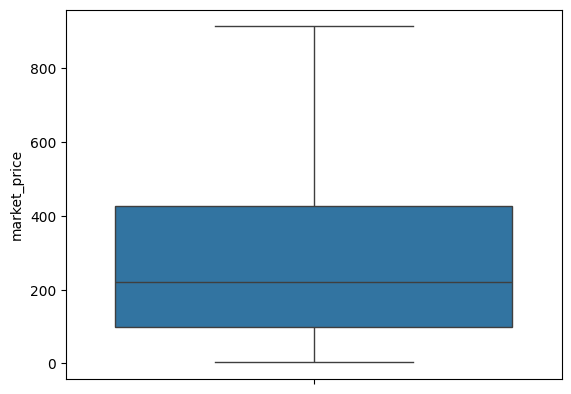

In [32]:
sns.boxplot(df['market_price'])
plt.show()

# **visualizations ..**

In [33]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,market_pricev
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,220.0
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",180.0
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",250.0
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,176.0
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,162.0


In [34]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [35]:
df['category'].unique()

array(['Beauty & Hygiene', 'Kitchen, Garden & Pets',
       'Cleaning & Household', 'Gourmet & World Food',
       'Foodgrains, Oil & Masala', 'Snacks & Branded Foods', 'Beverages',
       'Bakery, Cakes & Dairy', 'Baby Care', 'Fruits & Vegetables',
       'Eggs, Meat & Fish'], dtype=object)

In [36]:
df.isnull().sum().sum()

0

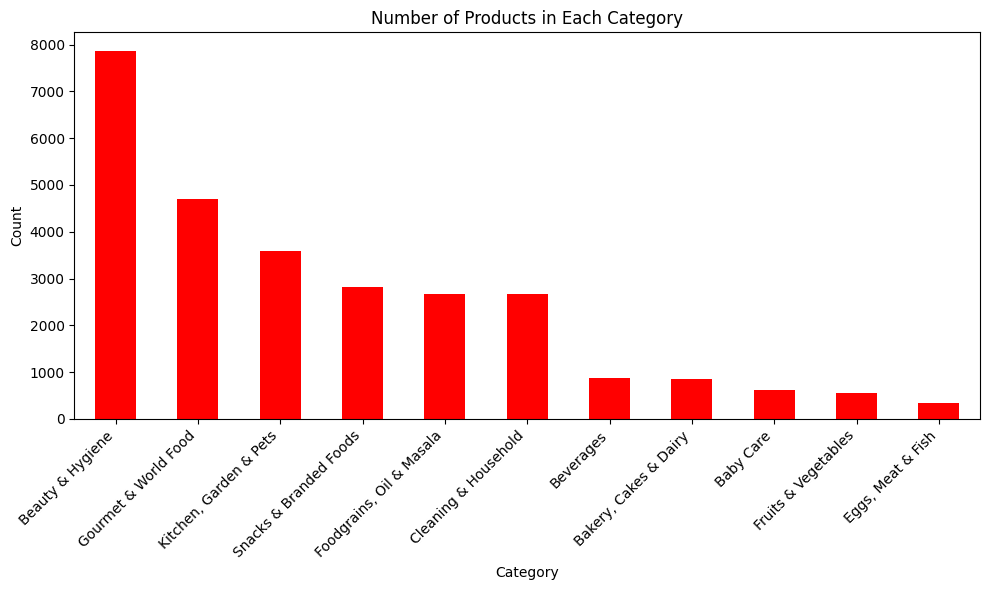

In [37]:
category_counts = df['category'].value_counts()
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color = "r",)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of Products in Each Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

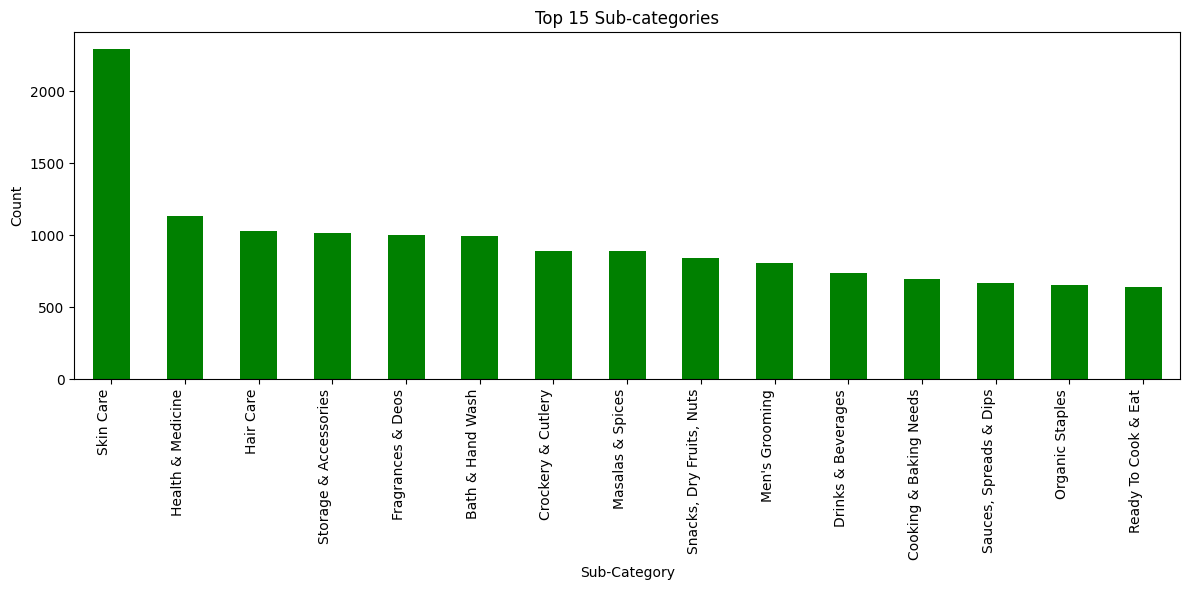

In [38]:

sub_category_counts = df['sub_category'].value_counts().head(15)
plt.figure(figsize=(12, 6))
sub_category_counts.plot(kind='bar', color='g')
plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.title('Top 15 Sub-categories')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

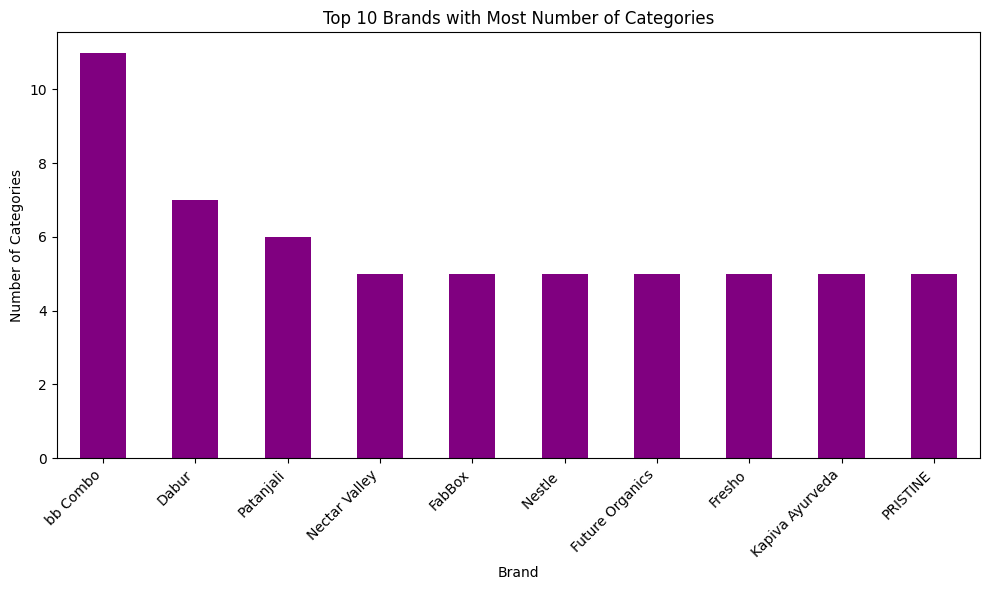

In [39]:
#BAR CHART: Draw a visualization of Top 10 brands with most number of Categories.
brand_category_counts = df.groupby('brand')['category'].nunique().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
brand_category_counts.plot(kind='bar', color='purple')
plt.title('Top 10 Brands with Most Number of Categories')
plt.xlabel('Brand')
plt.ylabel('Number of Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [40]:
# Calculate total sales for each product
df['total_sales'] = df['sale_price'] * df['rating']

# Group by product and sum total sales
product_sales = df.groupby('product')['total_sales'].sum().reset_index()

# Sort by total sales in descending order and select top 10
top_10_products = product_sales.sort_values(by=['total_sales'], ascending=False).head(10)

# Create the bar chart using Plotly
fig = px.bar(top_10_products, x='product', y='total_sales',
             title='Top 10 Products by Total Sales',
             labels={'product': 'Product', 'total_sales': 'Total Sales'})
fig.update_xaxes(tickangle=45, tickfont=dict(size=10))
fig.show()

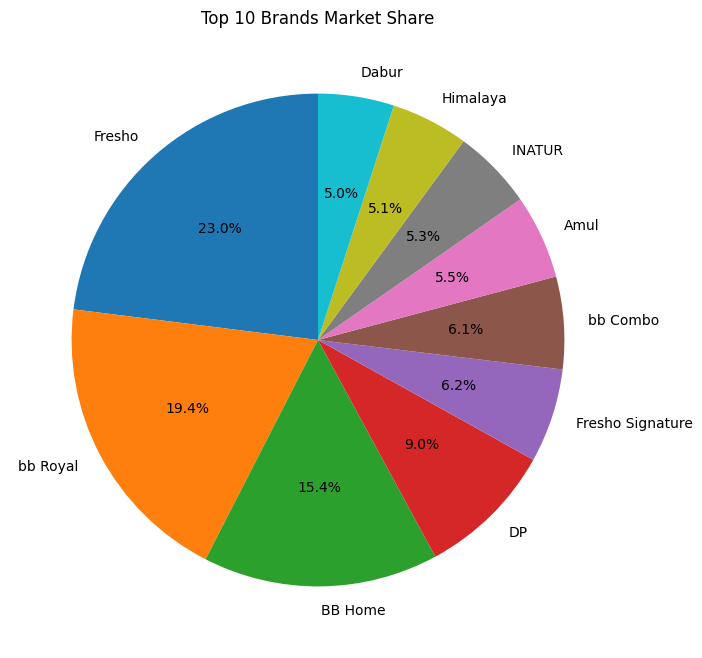

In [41]:
# Brand Performance and Market Share
brand_market_share = df['brand'].value_counts(normalize=True) * 100

# Select top N brands for visualization (adjust N as needed)
top_brands = brand_market_share.head(10)

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_brands, labels=top_brands.index, autopct='%1.1f%%', startangle=90)
plt.title(f'Top {10} Brands Market Share')
plt.show()

In [42]:
#Draw a visualization to compare Discount Distributions across Categories.
df['discount_percentage'] = (df['market_price'] - df['sale_price']) / df['market_price'] * 100
df['discount_percentage'] = df['discount_percentage']

**This line calculates the discount percentage for each product.
It subtracts the sale_price from the market_price to get the discount amount.
Then, it divides the discount amount by the market_price to get the discount as a fraction.
Finally, it multiplies by 100 to express the discount as a percentage**

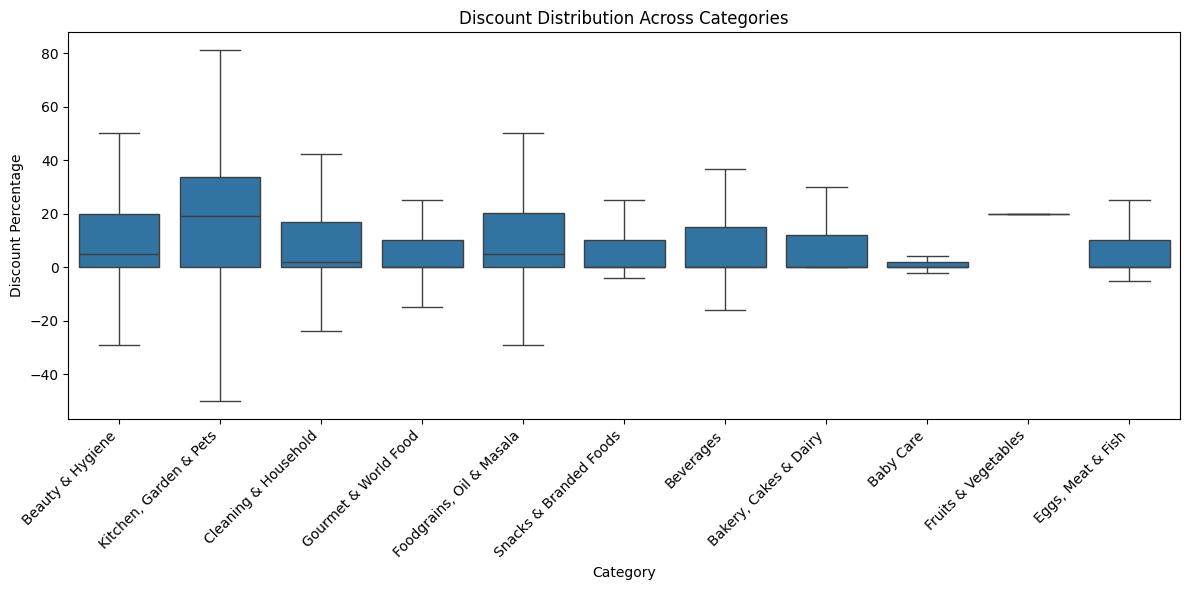

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='discount_percentage', data=df, showfliers=False)
plt.title('Discount Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Discount Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

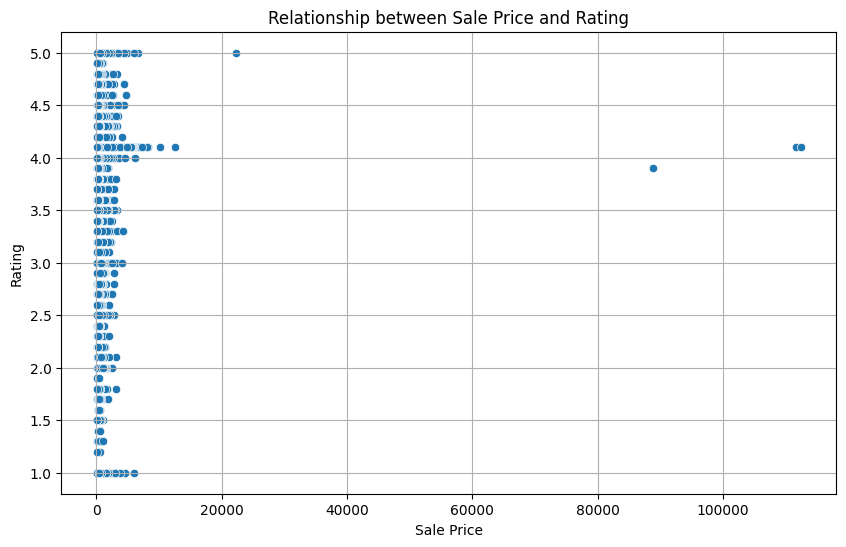

In [44]:
#: Draw a visualization to explore the relationship between Product Sale Price and
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sale_price', y='rating', data=df)
plt.title('Relationship between Sale Price and Rating')
plt.xlabel('Sale Price')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

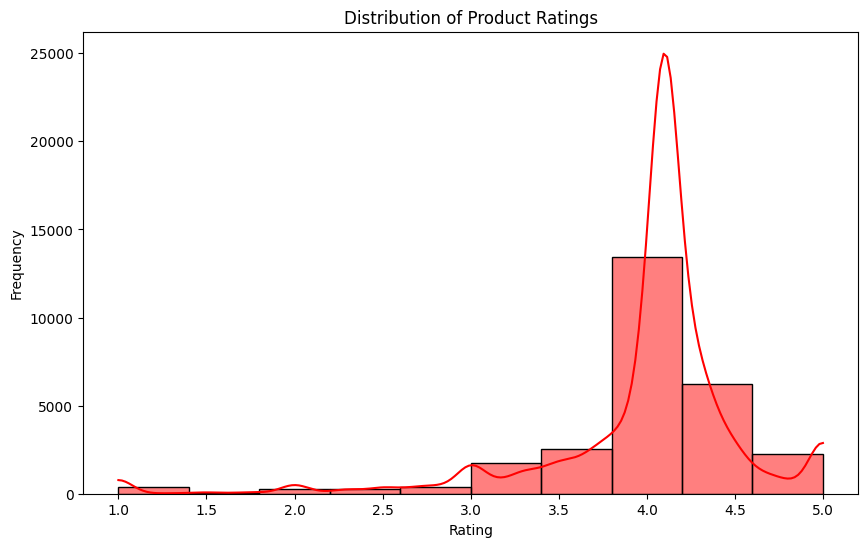

In [45]:
# Draw a visualization to show the Distribution of Product ratings.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=10, kde=True, color='red')  # Adjust bins as needed
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

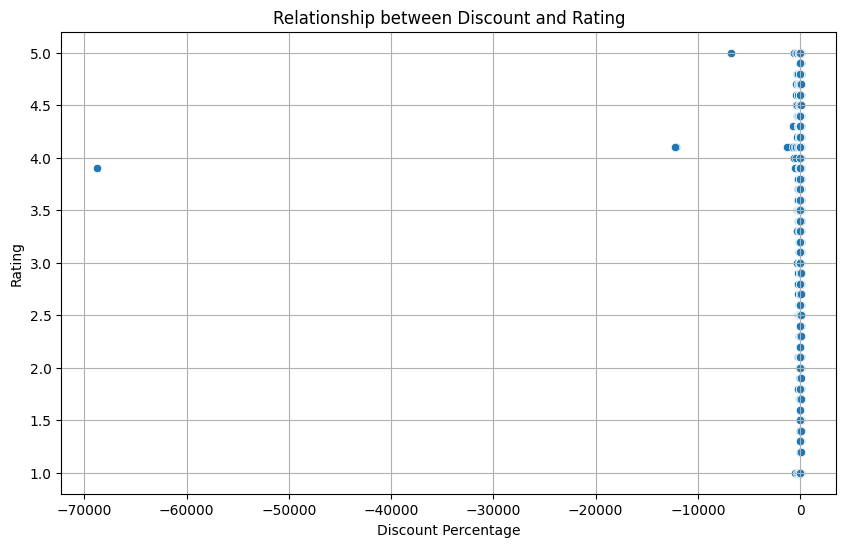

In [46]:
# Draw a visualization to see if there's any relationship between Discount and rating
df['discount_percentage'] = (df['market_price'] - df['sale_price']) / df['market_price'] * 100
df['discount_percentage'] = df['discount_percentage']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount_percentage', y='rating', data=df)
plt.title('Relationship between Discount and Rating')
plt.xlabel('Discount Percentage')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

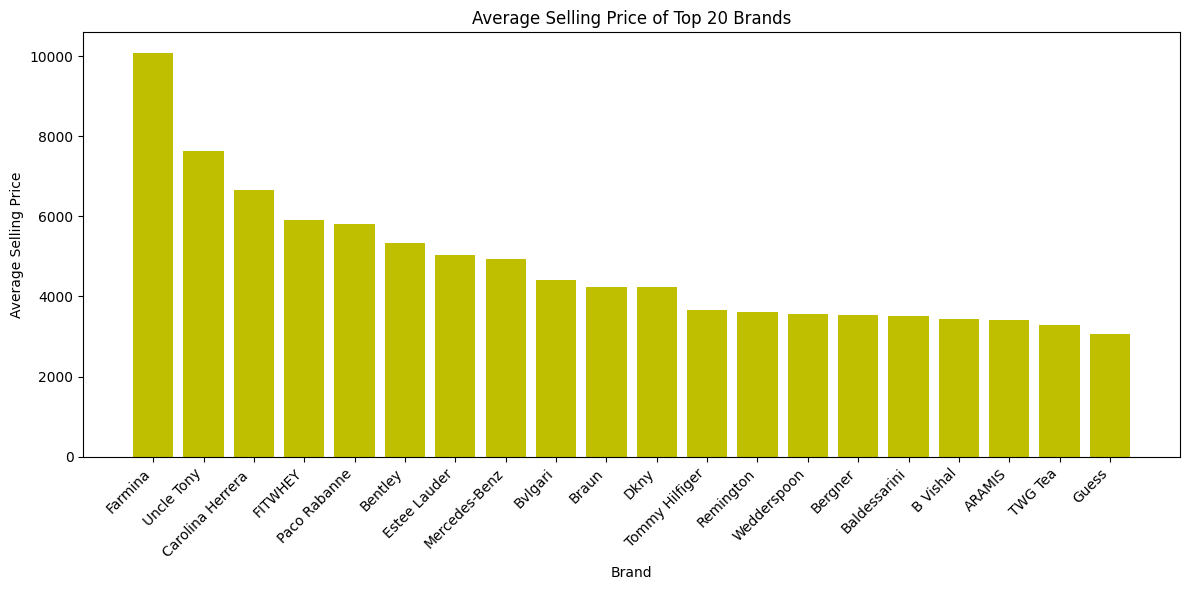

In [47]:
#average selling price of top 20 brands
brand_avg_prices = df.groupby('brand')['sale_price'].mean().reset_index()
top_20_brands = brand_avg_prices.sort_values(by=['sale_price'], ascending=False).head(20)

plt.figure(figsize=(12, 6))
plt.bar(top_20_brands['brand'], top_20_brands['sale_price'], color='y')
plt.title('Average Selling Price of Top 20 Brands')
plt.xlabel('Brand')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
